# Develop A Neural Network That Can Read Handwriting

## Importing the libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import seaborn as sn 

## Loading the data

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


In [5]:
#displaying the shape of a single handwriten digit
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

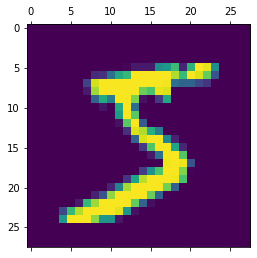

In [7]:
#dispalying the handwritten digit
plt.matshow(x_train[0])
plt.show()

In [8]:
y_train[0]

5

## Processing the data 

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flattened.shape

(60000, 784)


## Neural Network

In [12]:
x_test_flattened.shape

(10000, 784)

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9261


In [14]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9265


[0.2658771574497223, 0.9265000224113464]

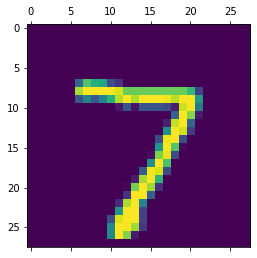

In [15]:
plt.matshow(x_test[0])

## Making Predictions

In [16]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.4665812e-02, 5.9720202e-07, 8.5007317e-02, 9.5274943e-01,
       2.0922648e-03, 1.5119147e-01, 1.3239315e-06, 9.9983329e-01,
       1.8627883e-01, 6.8478286e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

2

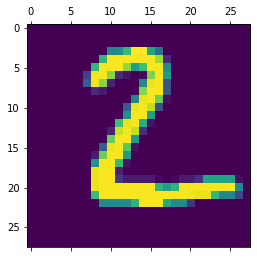

In [18]:
plt.matshow(x_test[1])
np.argmax(y_predicted[1])

In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    0,    5,    9,    3,    3,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   3,    9,  921,   14,    9,    4,   12,    9,   47,    4],
       [   3,    0,   19,  905,    1,   31,    3,   11,   30,    7],
       [   1,    1,    4,    1,  918,    0,    9,    3,   10,   35],
       [   7,    3,    2,   21,   10,  785,   17,    4,   36,    7],
       [   7,    3,    4,    1,    7,   14,  916,    2,    4,    0],
       [   1,    8,   25,    6,    6,    1,    0,  941,    4,   36],
       [   5,   10,    5,   16,    9,   24,    9,    9,  880,    7],
       [   8,    7,    2,    6,   22,    7,    0,   19,   13,  925]])>

Text(69.0, 0.5, 'Truth')

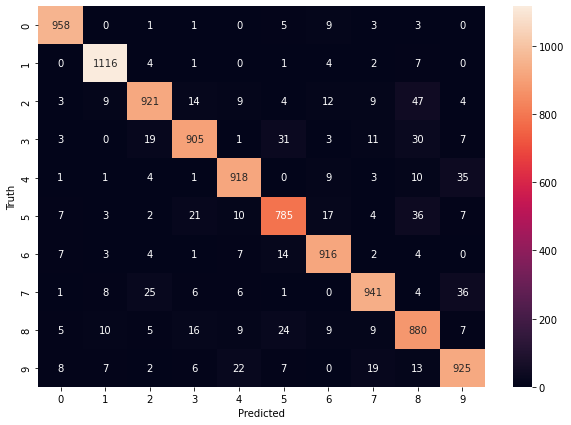

In [21]:

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [23]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1247 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0853 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9837


## Evaluating the model

In [24]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9763


[0.07551684230566025, 0.9763000011444092]